In [ ]:
#A group project on pair trading done by Shamith Kandregula,Divyanshu Tiwari, Shreyansh Srivastav, Rishab pandey

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [ ]:
NUM_TRADING_DAYS = 252


stocks = ["SUNPHARMA.NS", "DIVISLAB.NS", "CIPLA.NS", "BIOCON.NS", "TORNTPHARM.NS", "LUPIN.NS", "ZYDUSLIFE.NS","AUROPHARMA.NS","PEL.NS","ABBOTINDIA.NS"]

start_date = "2017-06-01"
end_date = "2020-06-01"

In [ ]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices.dropna()

,SUNPHARMA.NS,DIVISLAB.NS,CIPLA.NS,BIOCON.NS,TORNTPHARM.NS,LUPIN.NS,ZYDUSLIFE.NS,AUROPHARMA.NS,PEL.NS,ABBOTINDIA.NS
Date,,,,,,,,,,
2017-06-01 00:00:00+05:30,478.488922,564.069702,493.634979,156.432037,562.377563,1099.419556,426.363464,556.121948,2414.721924,3929.681396
2017-06-02 00:00:00+05:30,485.466553,579.483276,507.518616,158.786240,564.123291,1119.368896,447.412323,569.313904,2415.021973,3910.705811
2017-06-05 00:00:00+05:30,483.533600,591.101929,512.066772,160.862518,565.194092,1108.914551,444.153107,568.882202,2406.148682,3917.547119
2017-06-06 00:00:00+05:30,475.518677,590.539734,511.923096,162.105011,565.031067,1103.927246,443.157227,561.398743,2399.461182,3939.708984
2017-06-07 00:00:00+05:30,482.354919,605.109924,517.237244,163.118637,562.261108,1107.236084,486.069763,573.727173,2402.461182,3937.928467
...,...,...,...,...,...,...,...,...,...,...
2020-05-22 00:00:00+05:30,453.080017,2256.352295,622.526550,345.689392,1248.171021,872.828186,333.757812,712.117859,877.332520,15608.680664
2020-05-26 00:00:00+05:30,443.186371,2232.718750,611.183105,353.584106,1238.837280,885.733643,325.671326,696.577820,834.031860,15968.013672
2020-05-27 00:00:00+05:30,435.223206,2227.564209,616.392273,346.232239,1152.938599,874.588013,324.997467,695.067566,881.197876,15805.689453


In [ ]:

hedge_ratios = {}


stock_symbols = stock_prices.columns


for i in range(len(stock_symbols) - 1):
    for j in range(i + 1, len(stock_symbols)):
        stock_1 = stock_prices[stock_symbols[i]]
        stock_2 = stock_prices[stock_symbols[j]]


        X = sm.add_constant(stock_1)
        model = sm.OLS(stock_2, X).fit()
        hedge_ratio = model.params[stock_symbols[i]]


        pair = (stock_symbols[i], stock_symbols[j])
        hedge_ratios[pair] = hedge_ratio


hedge_ratios

{('SUNPHARMA.NS', 'DIVISLAB.NS'): -3.839539503832824,
 ('SUNPHARMA.NS', 'CIPLA.NS'): 0.7240746981704268,
 ('SUNPHARMA.NS', 'BIOCON.NS'): 0.025243953154421434,
 ('SUNPHARMA.NS', 'TORNTPHARM.NS'): -0.957364569370973,
 ('SUNPHARMA.NS', 'LUPIN.NS'): 0.9893266735144763,
 ('SUNPHARMA.NS', 'ZYDUSLIFE.NS'): 0.8176376459072379,
 ('SUNPHARMA.NS', 'AUROPHARMA.NS'): 0.645906404535014,
 ('SUNPHARMA.NS', 'PEL.NS'): 4.793078013511327,
 ('SUNPHARMA.NS', 'ABBOTINDIA.NS'): -25.49451964401563,
 ('DIVISLAB.NS', 'CIPLA.NS'): -0.06437191781922276,
 ('DIVISLAB.NS', 'BIOCON.NS'): 0.0657370768640432,
 ('DIVISLAB.NS', 'TORNTPHARM.NS'): 0.32523424027330705,
 ('DIVISLAB.NS', 'LUPIN.NS'): -0.16409595831461854,
 ('DIVISLAB.NS', 'ZYDUSLIFE.NS'): -0.1399248611630098,
 ('DIVISLAB.NS', 'AUROPHARMA.NS'): -0.0831971177811805,
 ('DIVISLAB.NS', 'PEL.NS'): -0.9295486989455575,
 ('DIVISLAB.NS', 'ABBOTINDIA.NS'): 7.111001030238059,
 ('CIPLA.NS', 'BIOCON.NS'): 0.0926375798690755,
 ('CIPLA.NS', 'TORNTPHARM.NS'): -0.829231238268

In [ ]:
#finding the pair using spread
spread_df = pd.DataFrame(index=stock_prices.index)
smallest_magnitude = float('inf')
selected_pair = None

for pair, hedge_ratio in hedge_ratios.items():
    stock1, stock2 = pair
    spread = np.log(stock_prices[stock1]) - hedge_ratio * np.log(stock_prices[stock2])
    spread_df[pair] = spread
    magnitude = np.abs(spread).mean()
    if magnitude < smallest_magnitude:
        smallest_magnitude = magnitude
        selected_pair = pair


selected_pair

('CIPLA.NS', 'LUPIN.NS')

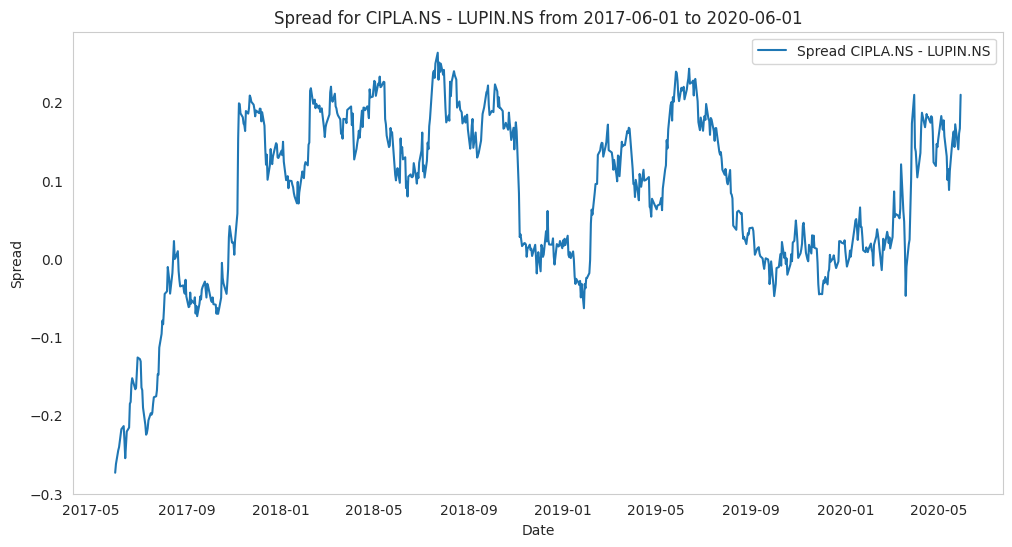

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(spread_df.index, spread_df[selected_pair], label=f"Spread {selected_pair[0]} - {selected_pair[1]}")
plt.title(f"Spread for {selected_pair[0]} - {selected_pair[1]} from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid()
plt.show()

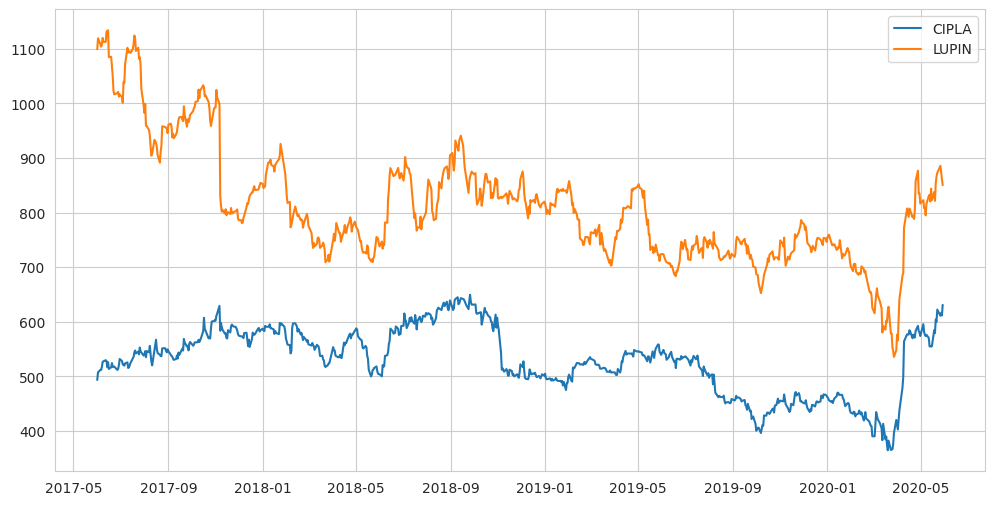

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(stock_prices['CIPLA.NS'], label = 'CIPLA')
plt.plot(stock_prices['LUPIN.NS'], label = 'LUPIN')
plt.legend()
plt.show()

In [ ]:
#cointegration test/analysis
spread_df = spread_df[start_date:end_date]
spread_values = spread_df[selected_pair].dropna()
result = adfuller(spread_values)
p_value = result[1]


if p_value < 0.05:
    print(f"The p-value is {p_value}. The signal is stationary with 95% confidence.")
else:
    print(f"The p-value is {p_value}. The signal is not stationary with 95% confidence.")

The p-value is 0.014936793774864265. The signal is stationary with 95% confidence.


In [ ]:
#FOR BACKTESTING
fstocks=['CIPLA.NS','LUPIN.NS']
start_date2 = "2020-06-01"
end_date2 = "2023-06-01"
stock_data2 = {}

for stock in fstocks:
  ticker = yf.Ticker(stock)
  stock_data2[stock] = ticker.history(start = start_date2, end = end_date2)['Close']

dataf = pd.DataFrame(stock_data2)
dataf.dropna()

,CIPLA.NS,LUPIN.NS
Date,,
2020-06-01 00:00:00+05:30,625.593628,830.738892
2020-06-02 00:00:00+05:30,620.822571,851.807983
2020-06-03 00:00:00+05:30,624.327820,848.092773
2020-06-04 00:00:00+05:30,643.168640,887.346741
2020-06-05 00:00:00+05:30,633.772644,882.213867
...,...,...
2023-05-25 00:00:00+05:30,930.147705,775.502808
2023-05-26 00:00:00+05:30,935.952148,776.598083
2023-05-29 00:00:00+05:30,940.772827,802.237427


In [ ]:
# hedge_ratio_new = {}


stock_symbols_new = dataf.columns

# X1 = sm.add_constant(dataf[stock_symbols_new[0]])
# model1 = sm.OLS(dataf[stock_symbols_new[1]], X1).fit()
# hedge_ratio1 = model1.params[stock_symbols_new[0]]

# print(hedge_ratio1)

spread_new = np.log(dataf[stock_symbols_new[0]]) - 0.9246970926256299 * np.log(dataf[stock_symbols_new[1]])


fdata=pd.DataFrame()

fdata['cipla']=dataf['CIPLA.NS']
fdata['lupin']=dataf['LUPIN.NS']
fdata['spread']=spread_new
fdata



,cipla,lupin,spread
Date,,,
2020-06-01 00:00:00+05:30,625.593628,830.738892,0.222595
2020-06-02 00:00:00+05:30,620.822571,851.807983,0.191780
2020-06-03 00:00:00+05:30,624.327820,848.092773,0.201452
2020-06-04 00:00:00+05:30,643.168640,887.346741,0.189345
2020-06-05 00:00:00+05:30,633.772644,882.213867,0.179993
...,...,...,...
2023-05-25 00:00:00+05:30,930.147705,775.502808,0.682861
2023-05-26 00:00:00+05:30,935.952148,776.598083,0.687776
2023-05-29 00:00:00+05:30,940.772827,802.237427,0.662878


In [ ]:
start_date2 = datetime.strptime(start_date2, "%Y-%m-%d")
end_date2 = datetime.strptime(end_date2, "%Y-%m-%d")


t = end_date2 - start_date2

fdata['rolling_mean'] = fdata['spread'].rolling(window=t).mean()
fdata['rolling_std'] = fdata['spread'].rolling(window=t).std()


fdata['z_scores'] = (fdata['spread'] - fdata['rolling_mean']) /fdata['rolling_std']

fdata=fdata.drop('rolling_mean',axis=1)

profit_exit_point=fdata['z_scores'].mean()
print(profit_exit_point)

fdata.dropna()



1.3965609977836402


,cipla,lupin,spread,rolling_std,z_scores
Date,,,,,
2020-06-02 00:00:00+05:30,620.822571,851.807983,0.191780,0.021790,-0.707107
2020-06-03 00:00:00+05:30,624.327820,848.092773,0.201452,0.015759,-0.242624
2020-06-04 00:00:00+05:30,643.168640,887.346741,0.189345,0.015133,-0.789520
2020-06-05 00:00:00+05:30,633.772644,882.213867,0.179993,0.016202,-1.051735
2020-06-08 00:00:00+05:30,618.388367,880.209717,0.157522,0.021684,-1.518442
...,...,...,...,...,...
2023-05-25 00:00:00+05:30,930.147705,775.502808,0.682861,0.271000,0.480820
2023-05-26 00:00:00+05:30,935.952148,776.598083,0.687776,0.270864,0.498541
2023-05-29 00:00:00+05:30,940.772827,802.237427,0.662878,0.270712,0.406302


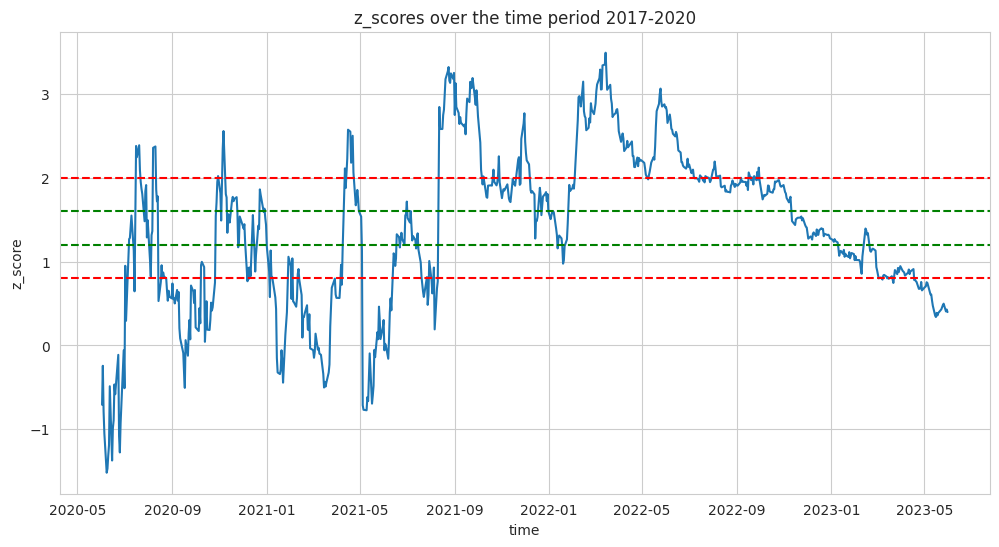

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fdata['z_scores'])

plt.xlabel('time')
plt.ylabel('z_score')
plt.title('z_scores over the time period 2017-2020')
plt.axhline(1.6, color='green', linestyle='--')
plt.axhline(1.2, color='green', linestyle='--')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(0.8, color='red', linestyle='--')
plt.show()

In [ ]:
#part 2: stratergy and trading signals

#By looking at the z-score graph it is optimal to take entry and exit scores as -1 & 1.5 respectively

#stop-loss points
lower_exit_zscore=-0.1
upper_exit_zscore=0.6


profit_exit_point=1.3965609839553217  #whose value is calculated above(mean of zscore)

#entry points

lower_entry=0 #buy cipla and sell lupin
upper_entry=0.1  #sell cipla and buy lupin

fdata['signal1'] = np.select( [ ((fdata['z_scores'] > 1.6) & (fdata['z_scores']< 2.0)), ((fdata['z_scores'] < 1.2) & (fdata['z_scores']> 0.9))], [1, -1], default = 0)

# fdata['signal1'] = np.select( [fdata['z_scores'] > 1.6, fdata['z_scores'] < 1.2 ], [1, -1], default = 0)-neglect this comment


fdata['position1'] = fdata['signal1'].diff()
fdata['signal2'] = -fdata['signal1']
fdata['position2'] = fdata['signal2'].diff()


print(fdata['signal1'].value_counts())
fdata.dropna()








 0    532
 1    146
-1     70
Name: signal1, dtype: int64


,cipla,lupin,spread,rolling_std,z_scores,signal1,position1,signal2,position2
Date,,,,,,,,,
2020-06-02 00:00:00+05:30,620.822571,851.807983,0.191780,0.021790,-0.707107,0,0.0,0,0.0
2020-06-03 00:00:00+05:30,624.327820,848.092773,0.201452,0.015759,-0.242624,0,0.0,0,0.0
2020-06-04 00:00:00+05:30,643.168640,887.346741,0.189345,0.015133,-0.789520,0,0.0,0,0.0
2020-06-05 00:00:00+05:30,633.772644,882.213867,0.179993,0.016202,-1.051735,0,0.0,0,0.0
2020-06-08 00:00:00+05:30,618.388367,880.209717,0.157522,0.021684,-1.518442,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2023-05-25 00:00:00+05:30,930.147705,775.502808,0.682861,0.271000,0.480820,0,0.0,0,0.0
2023-05-26 00:00:00+05:30,935.952148,776.598083,0.687776,0.270864,0.498541,0,0.0,0,0.0
2023-05-29 00:00:00+05:30,940.772827,802.237427,0.662878,0.270712,0.406302,0,0.0,0,0.0


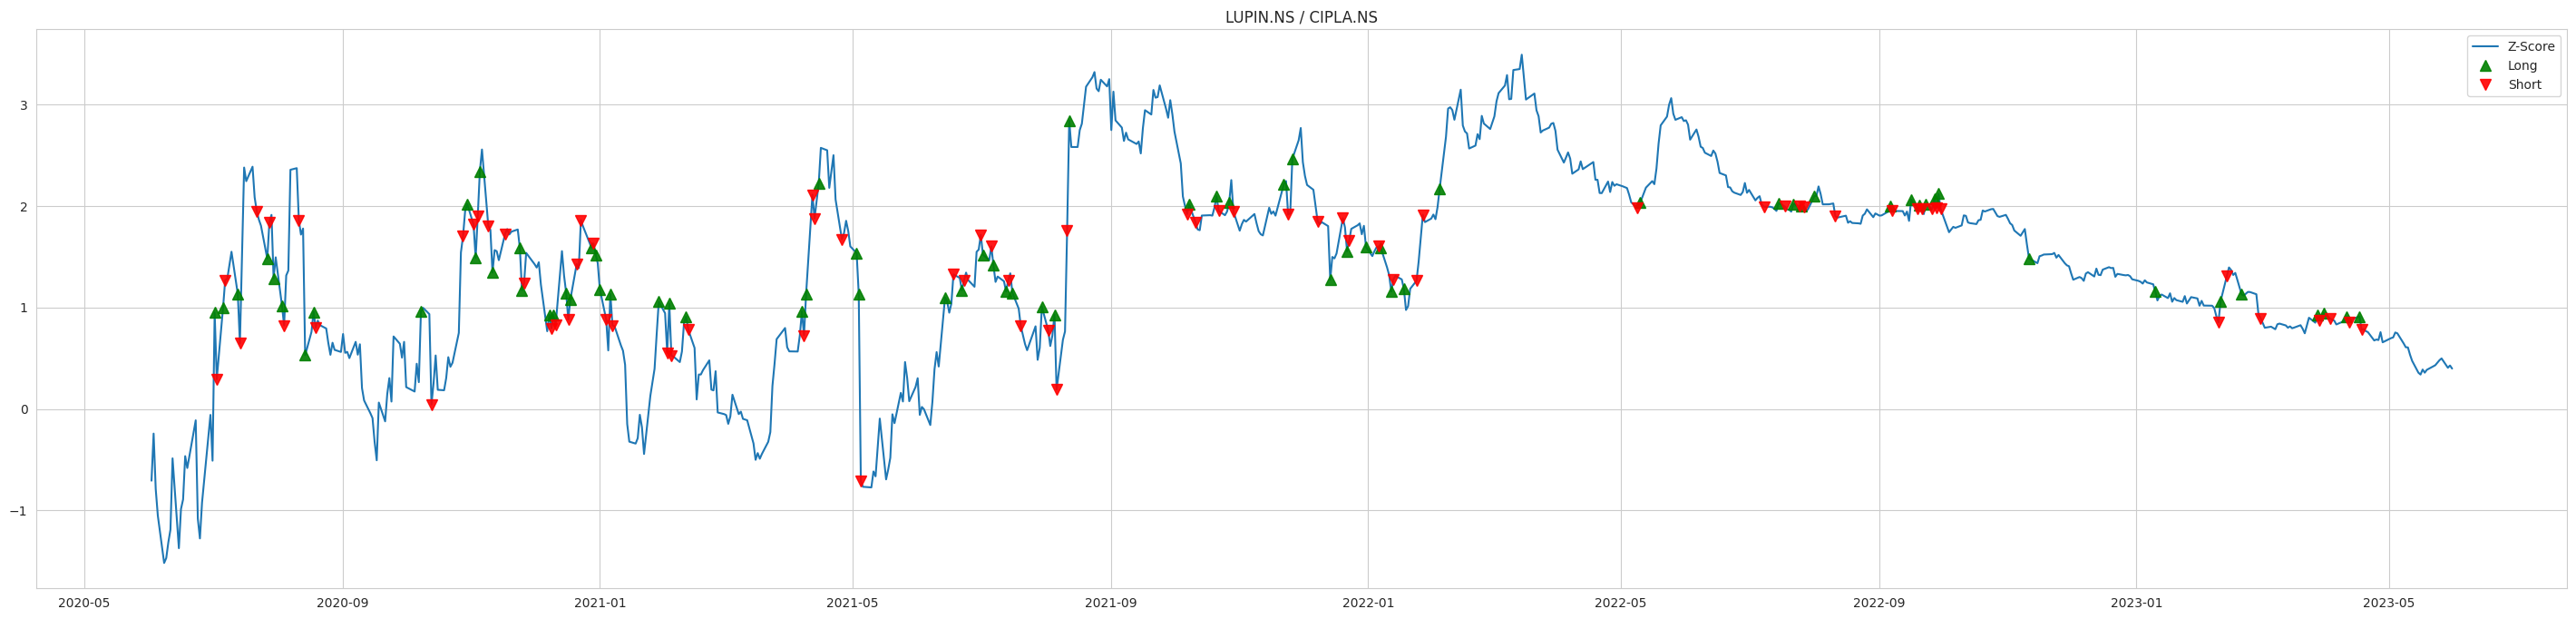

In [54]:

fig = plt.figure(figsize=(36, 8))
bx = fig.add_subplot(111)
series = bx.plot(fdata['z_scores'])
long = bx.plot(fdata['z_scores'][fdata['position1'] == -1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
short = bx.plot(fdata['z_scores'][fdata['position1'] == 1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
stock1 = fstocks[0]
stock2 = fstocks[1]
plt.title(f'{stock2} / {stock1}')
plt.legend(['Z-Score', 'Long', 'Short'])
plt.show()

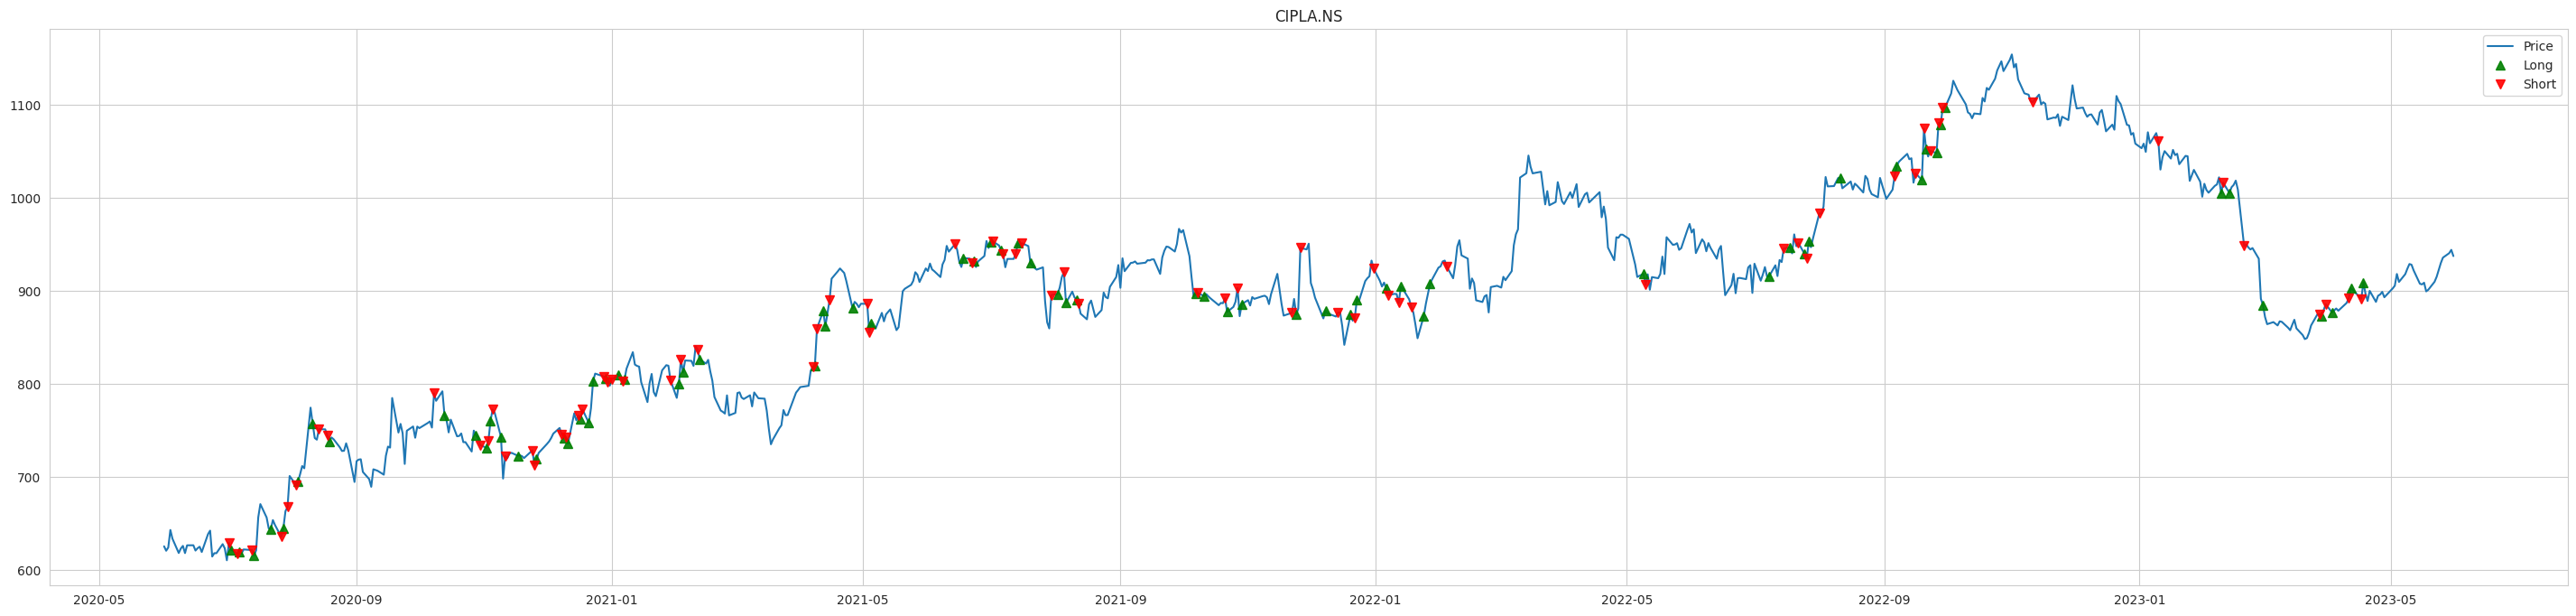

In [53]:
fig = plt.figure(figsize=(36,8))
bx = fig.add_subplot(111)
l1 = bx.plot(fdata['cipla'])
u1 = bx.plot(fdata['cipla'][fdata['position1'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
u2, = bx.plot(fdata['cipla'][fdata['position1'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
plt.title(fstocks[0])
plt.legend(['Price', 'Long', 'Short'])

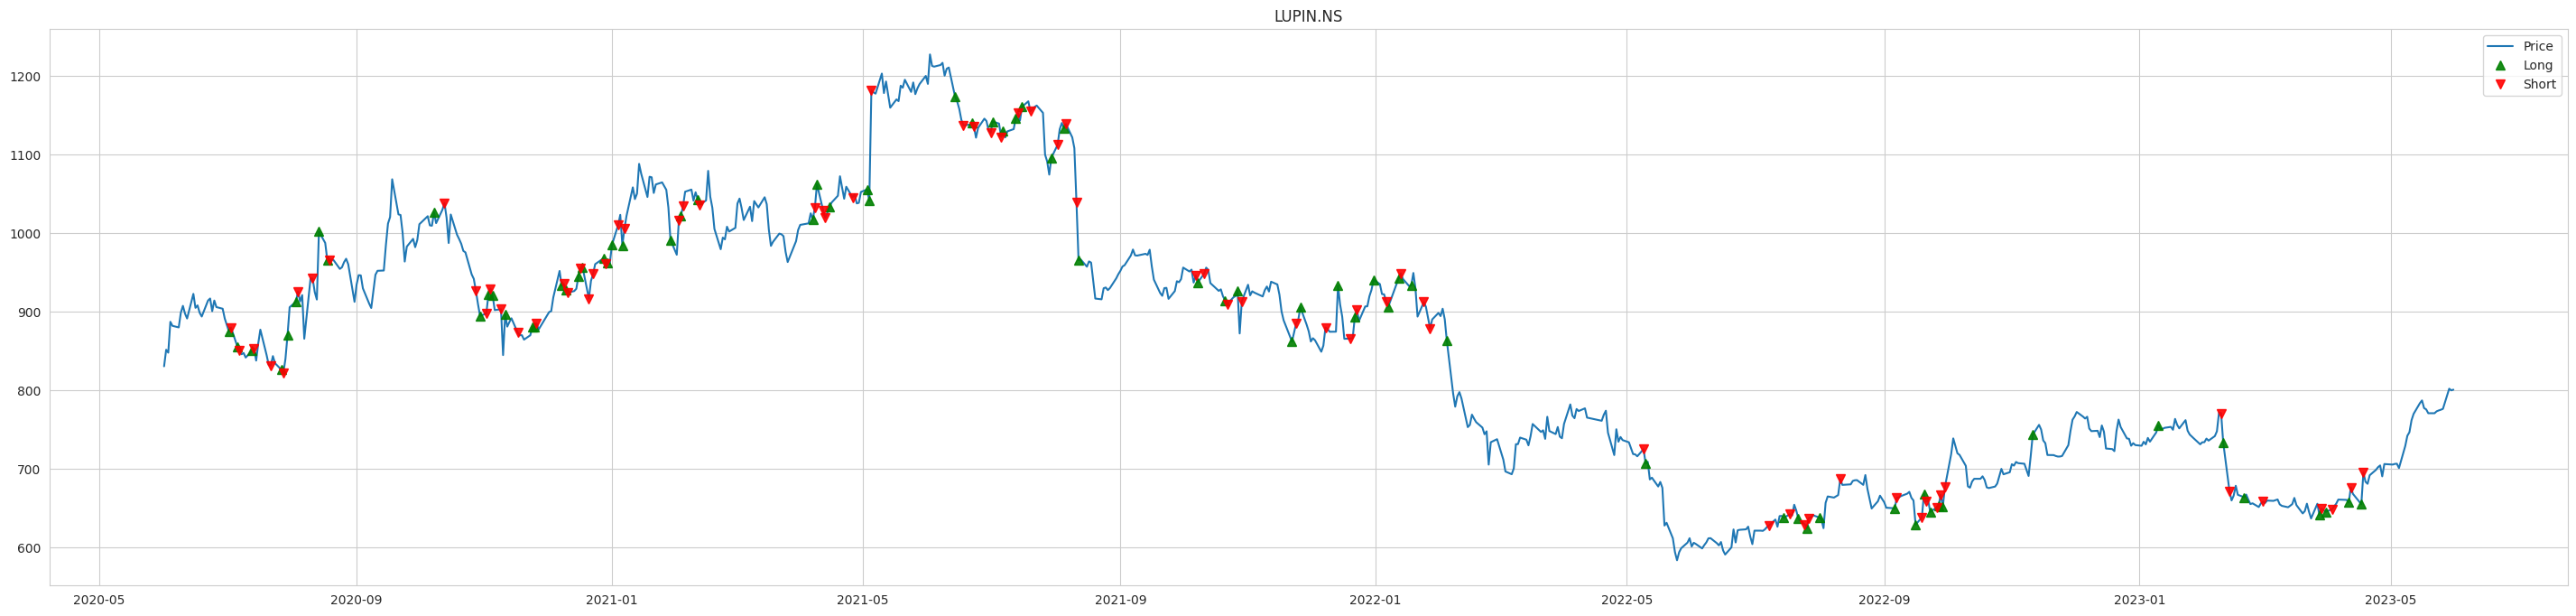

In [52]:
fig = plt.figure(figsize=(36,8))
bx = fig.add_subplot(111)
l1 = bx.plot(fdata['lupin'])
u1 = bx.plot(fdata['lupin'][fdata['position2'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
u2, = bx.plot(fdata['lupin'][fdata['position2'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
plt.title(fstocks[1])
plt.legend(['Price', 'Long', 'Short'])

In [ ]:
#initially in position sizing we have divided our capital equally

initial_capital1 = 60000
initial_capital2 = 40000
shares1 = initial_capital1 // (fdata['cipla'][0])
shares2 = initial_capital2 // (fdata['lupin'][0])

portfolio = pd.DataFrame()
portfolio['cipla_holdings'] = fdata['position1'].cumsum() * fdata['cipla'] * shares1
portfolio['cipla_cash'] = initial_capital1 - (fdata['position1'] * fdata['cipla'] * shares1).cumsum()
portfolio['cipla_total'] = portfolio['cipla_holdings'] + portfolio['cipla_cash']
portfolio['cipla_return'] = portfolio['cipla_total'].pct_change()

portfolio['lupin_holdings'] = fdata['position2'].cumsum() * fdata['lupin'] * shares2
portfolio['lupin_cash'] = initial_capital2 - (fdata['position2'] * fdata['lupin'] * shares2).cumsum()
portfolio['lupin_total'] = portfolio['lupin_holdings'] + portfolio['lupin_cash']
portfolio['lupin_return'] = portfolio['lupin_total'].pct_change()

portfolio['total'] = portfolio['cipla_total'] + portfolio['lupin_total']
portfolio.dropna(inplace=True)
portfolio


In [ ]:
plt.figure(figsize=(15,8),)
plt.plot(portfolio['total'])
plt.title('portfolio PnL over the time period 2020-2023')
plt.xlabel('time')
plt.ylabel('total_asset')
plt.show()


In [ ]:
# frequency of trades placed =no of trading days that is either or pair is SHORT or LONG position
# we have calculated no of 1's and -1's in signal column
frequency_of_trades_placed=746
final_portfolio=portfolio['total'][745]
initial_portfolio=portfolio['total'][2]
YEAR_DAYS = 252
CAGR = ((final_portfolio/initial_portfolio) ** (YEAR_DAYS/frequency_of_trades_placed) - 1)*100
CAGR



In [ ]:
from statsmodels.tools.sm_exceptions import PerfectSeparationError
rows1 = portfolio.loc[["2021-06-01 00:00:00+05:30"]]
rows2 = portfolio.loc[["2022-06-01 00:00:00+05:30"]]
rows3 = portfolio.loc[["2023-05-31 00:00:00+05:30"]]

expected_return_pct1=((rows1['total'][0]-100000)/100000)*100
expected_return_pct2=((rows2['total'][0]-rows1['total'][0])/rows1['total'][0])*100
expected_return_pct3=((rows3['total'][0]-rows2['total'][0])/rows2['total'][0])*100

pct_portfolio_std=(portfolio['total'].std()/portfolio['total'].mean())*100

#annulised_sharpe_ratio=expected portfolio return(%) -3%(govt.standard) /pct_portfolio_std
#all the above values are in percentage

sharpe_ratio1=(expected_return_pct1-3)/pct_portfolio_std
sharpe_ratio2=(expected_return_pct2-3)/pct_portfolio_std
sharpe_ratio3=(expected_return_pct3-3)/pct_portfolio_std

print(sharpe_ratio1)
print(sharpe_ratio2)
print(sharpe_ratio3)



In [ ]:
portfolio_max=portfolio['total'].max()
portfolio_trough=portfolio['total'].min()
max_drawdown=(portfolio_max-portfolio_trough)/portfolio_max
max_drawdown